In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd

%matplotlib inline

#### 1.创建初步图形

In [9]:
G = nx.Graph()

#### 1.1添加节点和边

In [10]:
node = range(1,9)
edge = [(1,2),(2,3),(2,8),(3,6),(3,7),(4,7),(5,7)]

In [11]:
G.add_edges_from(edge)
G.add_nodes_from(node)

In [12]:
G.nodes()

NodeView((1, 2, 3, 8, 6, 7, 4, 5))

In [13]:
G.edges()

EdgeView([(1, 2), (2, 3), (2, 8), (3, 6), (3, 7), (7, 4), (7, 5)])

#### 1.2图像初步显示

C:\Users\cc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


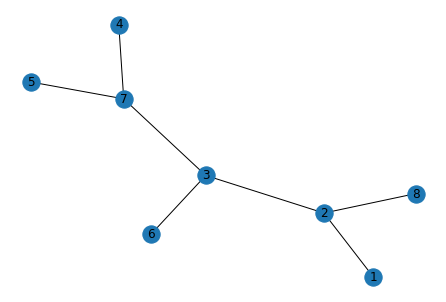

In [14]:
nx.draw(G,with_labels=True)

#### 1.3定义pos，锁定每个节点位置spring_layout()

In [15]:
pos = nx.spring_layout(G)

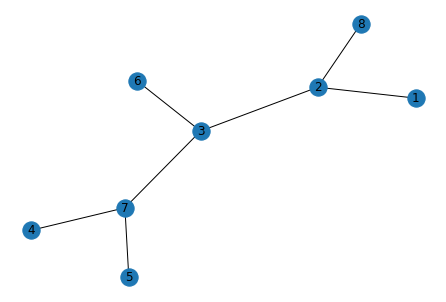

In [16]:
nx.draw(G,pos=pos,with_labels=True)

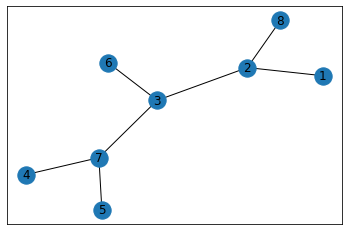

In [17]:
nx.draw_networkx(G,pos=pos,with_labels=True)

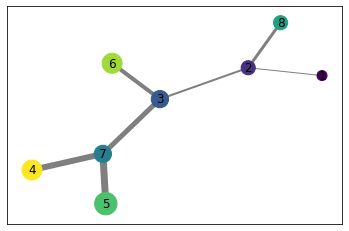

In [18]:
nx.draw_networkx(G,pos=pos,with_labels=True,width=0,node_size=0)
nx.draw_networkx_nodes(G,pos=pos,
                      nodelist=range(1,9),
                      node_size=[100,200,300,400,500,400,300,200],
                      node_color=G.nodes())
nx.draw_networkx_edges(G,pos=pos,
                      edge_list=range(1,9),
                      width=range(1,9),
                      alpha=0.5)

#### 2.实例演示

In [19]:
#获取需要进行图形化的数据
city_net = pd.read_excel('./file/city_net/city_net.xlsx')
city_net.head(2)

,Unnamed: 0,SSGS_city,ZGS_city,count
0,1136,北京市,深圳市,885
1,952,北京市,上海市,423


In [20]:
#将数据转换为networkx图像对象
GA = nx.from_pandas_edgelist(city_net,source='SSGS_city',target='ZGS_city',edge_attr='count')

In [21]:
GA

In [22]:
#读取城市坐标
net_use = pd.read_csv('./file/city_net/coord.csv')
net_use = net_use[['city_01','lng_gis','lat_gis']]
net_use.head(1)

,city_01,lng_gis,lat_gis
0,巴彦淖尔市,463639.979732,4.590537e+06


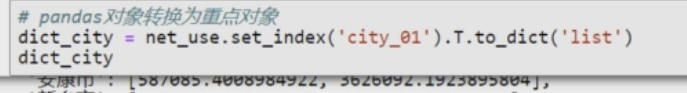

In [23]:
city_list = net_use['city_01']
city_list

0          巴彦淖尔市
1            徐州市
2            长沙市
3            达州市
4            酒泉市
         ...    
360    西双版纳傣族自治州
361          NaN
362          NaN
363          NaN
364          NaN
Name: city_01, Length: 365, dtype: object

In [24]:
country = gpd.GeoDataFrame.from_file('./file/shp/china_arc2.shp',encoding='gbk')
country = country.to_crs({'init':'epsg:2381'})
# country.geometry()

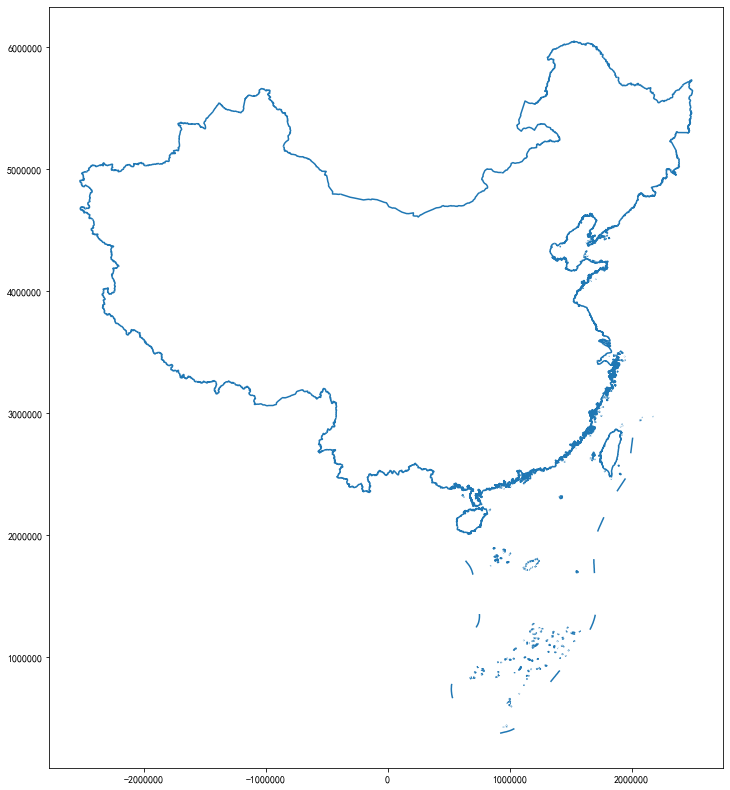

In [7]:
country.plot(figsize=(14,14))